In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import tensorflow as tfm
if tfm.test.gpu_device_name():
  print (f'Se encontró el siguientr GPU: {tfm.test.gpu_device_name()}')
else:
  print('Aqui no hay GPU´s')

Aqui no hay GPU´s


In [51]:
encodings = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings:
    try:
        df = pd.read_csv('DisneylandReviews.csv', encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error reading the file with encoding:", encoding)
df.head()


Error reading the file with encoding: utf-8
File read successfully with encoding: ISO-8859-1


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [52]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [53]:
df.duplicated().sum()

12

In [54]:
df.drop_duplicates(keep='first', inplace=True)

In [55]:
df['Reviewer_Location'].value_counts()

Reviewer_Location
United States     14545
United Kingdom     9751
Australia          4677
Canada             2234
India              1511
                  ...  
Namibia               1
Armenia               1
Timor-Leste           1
South Sudan           1
Åland Islands         1
Name: count, Length: 162, dtype: int64

In [56]:
df['Reviewer_Location'].unique()

array(['Australia', 'Philippines', 'United Arab Emirates',
       'United Kingdom', 'Singapore', 'India', 'Malaysia',
       'United States', 'Canada', 'Myanmar (Burma)', 'Hong Kong', 'China',
       'Indonesia', 'Qatar', 'New Zealand', 'Sri Lanka', 'Uganda',
       'Thailand', 'Austria', 'South Africa', 'Saudi Arabia', 'Japan',
       'Israel', 'South Korea', 'Turkey', 'Macau', 'Egypt', 'Mexico',
       'Mauritius', 'Sweden', 'Brazil', 'Kenya', 'Vietnam', 'Portugal',
       'Cambodia', 'Zambia', 'Croatia', 'France', 'Taiwan', 'Oman',
       'Colombia', 'Norway', 'Kuwait', 'Netherlands', 'Barbados',
       'Finland', 'Bosnia and Herzegovina', 'Brunei', 'Bahrain',
       'Maldives', 'Ireland', 'Russia', 'Romania',
       'Northern Mariana Islands', 'Germany', 'Chile', 'Isle of Man',
       'Pakistan', 'Ukraine', 'Greece', 'Switzerland', 'Spain', 'Estonia',
       "Côte d'Ivoire", 'Guam', 'Bangladesh', 'Belgium', 'Italy',
       'Botswana', 'Denmark', 'Argentina', 'Peru', 'Lithuania', 'I

In [57]:
df['Rating'].value_counts()

Rating
5    23140
4    10771
3     5107
2     2127
1     1499
Name: count, dtype: int64

In [58]:
df['Branch'].value_counts()

Branch
Disneyland_California    19404
Disneyland_Paris         13629
Disneyland_HongKong       9611
Name: count, dtype: int64

In [59]:
import re
import nltk
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lorenzoreinoso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lorenzoreinoso/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lorenzoreinoso/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
def preprocesamiento_texto(texto):

    # haces todo el texto en minúsculas
    texto=texto.lower()

    # regex para caracteres especiales y números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)

    # tokenizar el texto
    texto_tokenized= word_tokenize(texto)

    # eliminar stopwords
    texto_no_stop = [token for token in texto_tokenized if token not in stop_words_en]

    # lematizar/unir las palabras procesadas nuevamente en una cadena
    final= [lemmatizer.lemmatize (word) for word in texto_no_stop]
    final=' '.join(final)

    return final

In [61]:
df['texto_limpio'] = df['Review_Text'].apply(preprocesamiento_texto)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,youve ever disneyland anywhere youll find disn...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,since last time visit hk disneyland yet time s...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god hot humid visiting park otherwise w...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortunately...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,location city took around hour kowlon kid like...


In [62]:
def sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [63]:
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,youve ever disneyland anywhere youll find disn...,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,since last time visit hk disneyland yet time s...,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god hot humid visiting park otherwise w...,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortunately...,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,location city took around hour kowlon kid like...,Positive


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


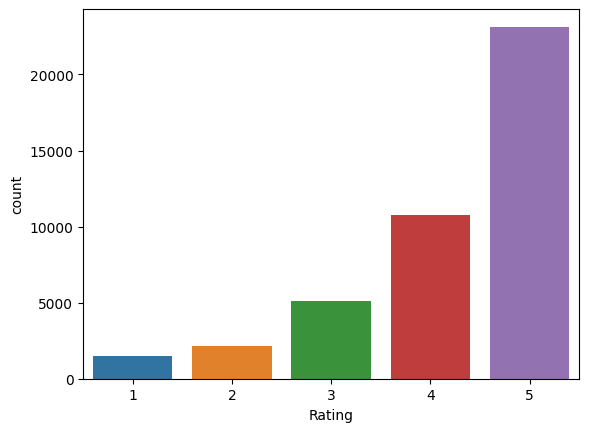

In [64]:
sns.countplot(x=df['Rating'])
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


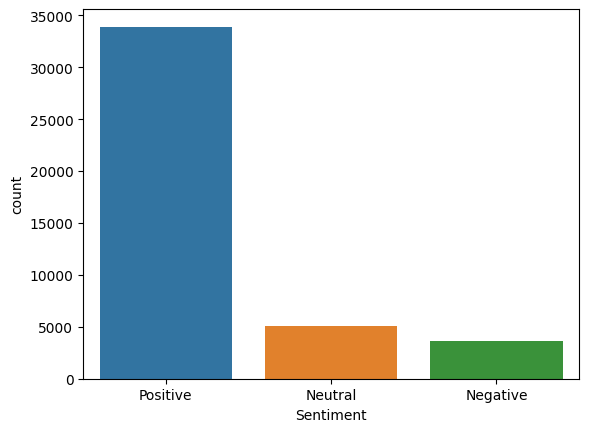

In [65]:
sns.countplot(x=df['Sentiment'])
plt.show()

In [66]:
pos = df[df['Sentiment'] == 'Positive'].sample(3000)
neg = df[df['Sentiment'] == 'Negative'].sample(3000)
neu = df[df['Sentiment'] == 'Neutral'].sample(3000)

df = pd.concat([pos,neg,neu],axis=0)
df.shape

(9000, 8)

In [67]:
with open('/Users/lorenzoreinoso/Documents/Files/glove.6B.300d.txt', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:])
        embeddings[word] = vectors

def vectorize(text):
    vector_size = 300
    texto = text.lower()
    texto = re.sub(r'[^a-zA-Z0-9\s]', '',texto)
    texto = word_tokenize(texto)
    texto = [palabra for palabra in texto if palabra not in stop_words_en]
    texto = [lemmatizer.lemmatize(palabra)for palabra in texto]
    vector = np.zeros(vector_size)
    for palabra in texto:
        if palabra in embeddings:
            vector = vector + embeddings[palabra].astype('float')
        else:
            print(f"No hay un embedding para la palabra {palabra}. Omitiendo...")
    vector = vector.reshape(1,-1)[0]
    return vector

In [68]:
df['vector']=df['Review_Text'].apply(vectorize)
df.head(10)

No hay un embedding para la palabra oldi. Omitiendo...
No hay un embedding para la palabra expediacomauthe. Omitiendo...
No hay un embedding para la palabra itfantasmic. Omitiendo...
No hay un embedding para la palabra spotlessfavorite. Omitiendo...
No hay un embedding para la palabra thoughrecommend. Omitiendo...
No hay un embedding para la palabra screensbest. Omitiendo...
No hay un embedding para la palabra dissappointing. Omitiendo...
No hay un embedding para la palabra sacr. Omitiendo...
No hay un embedding para la palabra 800pm. Omitiendo...
No hay un embedding para la palabra seqouia. Omitiendo...
No hay un embedding para la palabra moulon. Omitiendo...
No hay un embedding para la palabra goodcolleen. Omitiendo...
No hay un embedding para la palabra hk10. Omitiendo...
No hay un embedding para la palabra thoughtfulwhen. Omitiendo...
No hay un embedding para la palabra roomsour. Omitiendo...
No hay un embedding para la palabra nightwe. Omitiendo...
No hay un embedding para la pala

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment,vector
24665,156431273,5,2013-3,United States,We have been to Disneyland several times and e...,Disneyland_California,disneyland several time every time go look for...,Positive,"[-2.4749454, 0.6923800000000001, -0.8358706000..."
12308,511147828,5,2016-10,United States,"I usually visit with family, this time I made ...",Disneyland_California,usually visit family time made solo trip treat...,Positive,"[-2.2821659999999997, 1.7402559999999996, -3.5..."
25732,141957123,5,2012-10,Australia,"We are from Aus , and got the 14 day pass. Wha...",Disneyland_California,au got day pas great value expediacomauthe att...,Positive,"[-4.491648, 0.5873024000000007, -2.358953, -9...."
17980,301680261,5,2015-7,United States,Our family went to Disneyland for the first ti...,Disneyland_California,family went disneyland first time spent two da...,Positive,"[-1.6279592999999999, -0.03151459999999972, -5..."
12349,509112280,5,2017-8,Netherlands,This was my first visit to any of the Disney p...,Disneyland_California,first visit disney park must admit skeptical f...,Positive,"[-5.081499, 5.195766539999999, -3.764633000000..."
5598,301162488,5,2015-7,United States,"While smaller than other Disney parks, this th...",Disneyland_HongKong,smaller disney park theme park well keep stand...,Positive,"[-11.436763599999995, 3.476040999999997, 2.212..."
21145,226434837,5,2013-10,Australia,Pro tip you can ride with the monorail drive...,Disneyland_California,pro tip ride monorail driver beeline first car...,Positive,"[0.14869099999999996, 0.08474610000000021, -0...."
10064,638974099,5,2018-4,United States,I treated my two daughters to a long weekend i...,Disneyland_California,treated two daughter long weekend california c...,Positive,"[-2.375115000000001, -0.31618500000000005, -1...."
40244,149066239,4,2012-12,United Arab Emirates,"As this was our first visit to Paris, we reall...",Disneyland_Paris,first visit paris really clue go place read on...,Positive,"[-8.270813299999997, 1.3049537999999994, -8.64..."
5520,308333394,5,2014-10,United States,Memorable Experience. Kid Friendly rides. Had ...,Disneyland_HongKong,memorable experience kid friendly ride fun com...,Positive,"[-0.547663, 0.14929509999999996, -1.0165554, -..."


In [69]:
mapper={
    'Negative':0,
    'Neutral':1,
    'Positive':2,
}

df['Sentiment']= df['Sentiment'].map(mapper)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment,vector
24665,156431273,5,2013-3,United States,We have been to Disneyland several times and e...,Disneyland_California,disneyland several time every time go look for...,2,"[-2.4749454, 0.6923800000000001, -0.8358706000..."
12308,511147828,5,2016-10,United States,"I usually visit with family, this time I made ...",Disneyland_California,usually visit family time made solo trip treat...,2,"[-2.2821659999999997, 1.7402559999999996, -3.5..."
25732,141957123,5,2012-10,Australia,"We are from Aus , and got the 14 day pass. Wha...",Disneyland_California,au got day pas great value expediacomauthe att...,2,"[-4.491648, 0.5873024000000007, -2.358953, -9...."
17980,301680261,5,2015-7,United States,Our family went to Disneyland for the first ti...,Disneyland_California,family went disneyland first time spent two da...,2,"[-1.6279592999999999, -0.03151459999999972, -5..."
12349,509112280,5,2017-8,Netherlands,This was my first visit to any of the Disney p...,Disneyland_California,first visit disney park must admit skeptical f...,2,"[-5.081499, 5.195766539999999, -3.764633000000..."


In [70]:
from sklearn.model_selection import train_test_split

X_cnn = np.array(df['vector'].tolist())
y_cnn = df['Sentiment']

X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn = train_test_split(X_cnn,
                                                 y_cnn,
                                                 train_size=0.75,
                                                 random_state=101,
                                                 stratify=y_cnn)

In [71]:
y_test_cnn.shape

(2250,)

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler_cnn = MinMaxScaler()
X_train_cnn = scaler_cnn.fit_transform(X_train_cnn)
X_test_cnn = scaler_cnn.transform(X_test_cnn)

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [74]:
early_stopping_cnn= EarlyStopping(monitor='val_loss',
                              patience=7,
                              restore_best_weights=True)

In [75]:
y_train_cnn

41635    0
41135    0
2916     2
25533    2
24990    0
        ..
21142    1
1478     1
42117    2
4591     2
36167    1
Name: Sentiment, Length: 6750, dtype: int64

In [76]:
y_train_cnn=to_categorical(y_train_cnn,3)
y_test_cnn=to_categorical(y_test_cnn,3)

In [77]:
y_train_cnn.shape

(6750, 3)

In [78]:
y_train_cnn

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [79]:
X_train_cnn= X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1],1)
X_test_cnn= X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1],1)

In [80]:
model_cnn=Sequential()
model_cnn.add(Conv1D(32,2, activation='relu', input_shape=X_train_cnn[0].shape))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.35))
model_cnn.add(Dense(3, activation='softmax'))

model_cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
history_cnn=model_cnn.fit(X_train_cnn,
                  y_train_cnn,
                  epochs=100,
                  validation_data=(X_test_cnn, y_test_cnn),
                  callbacks=[early_stopping_cnn])

Epoch 1/100
211/211 [==============================] - 1s 4ms/step - loss: 1.1017 - accuracy: 0.3364 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
211/211 [==============================] - 1s 3ms/step - loss: 1.0987 - accuracy: 0.3298 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/100
211/211 [==============================] - 1s 4ms/step - loss: 1.0987 - accuracy: 0.3304 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/100
211/211 [==============================] - 1s 4ms/step - loss: 1.0987 - accuracy: 0.3219 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/100
211/211 [==============================] - 1s 4ms/step - loss: 1.0987 - accuracy: 0.3270 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/100
211/211 [==============================] - 1s 4ms/step - loss: 1.0987 - accuracy: 0.3203 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/100
211/211 [==============================] - 1s 3ms/step - loss: 1.0987 - accuracy: 0.3320 - val_loss: 1.0986 - val_accuracy: 0.3333

In [82]:
metrics_cnn=pd.DataFrame(history_cnn.history)
metrics_cnn.head()

,loss,accuracy,val_loss,val_accuracy
0,1.101736,0.336444,1.098624,0.333333
1,1.098717,0.329778,1.098613,0.333333
2,1.098745,0.330370,1.098619,0.333333
3,1.098722,0.321926,1.098613,0.333333
4,1.098720,0.326963,1.098616,0.333333


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: >

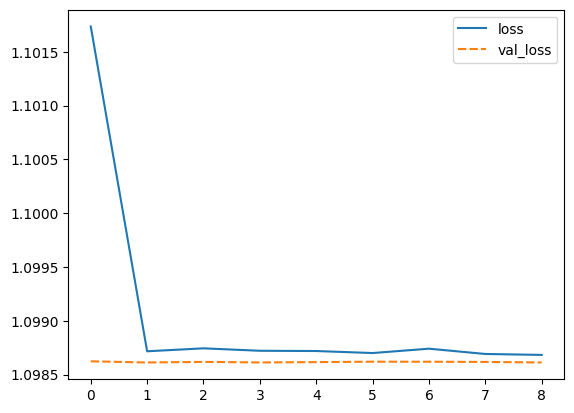

In [83]:
import seaborn as sns
sns.lineplot(data=metrics_cnn[['loss', 'val_loss']])

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: >

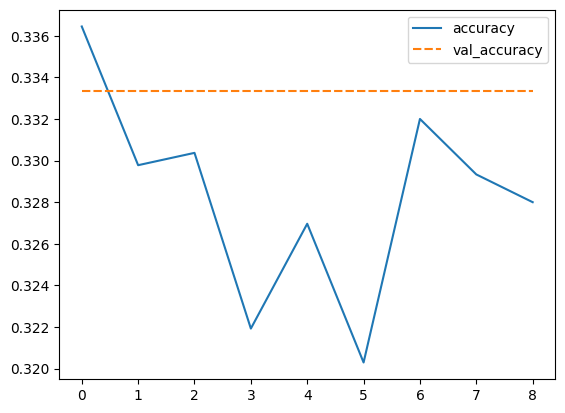

In [84]:
sns.lineplot(data=metrics_cnn[['accuracy', 'val_accuracy']])

In [85]:
y_pred_cnn=model_cnn.predict(X_test_cnn)

71/71 [==============================] - 0s 890us/step


In [86]:
y_pred_cnn=np.argmax(model_cnn.predict(X_test_cnn), axis=-1)
y_pred_cnn

71/71 [==============================] - 0s 946us/step


array([2, 2, 2, ..., 2, 2, 2])

In [87]:
y_test_cnn=np.argmax(y_test_cnn, axis=-1)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cnn, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       750
           1       0.00      0.00      0.00       750
           2       0.33      1.00      0.50       750

    accuracy                           0.33      2250
   macro avg       0.11      0.33      0.17      2250
weighted avg       0.11      0.33      0.17      2250



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

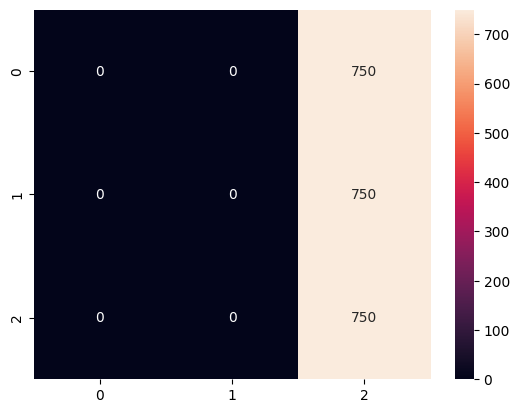

In [89]:
sns.heatmap(confusion_matrix(y_test_cnn, y_pred_cnn), annot=True, fmt='.0f')

In [90]:
def predict(text):
  text=vectorize(text)
  text=text.reshape(1,-1)
  text=scaler_cnn.transform(text)
  text=text.reshape(1,300,1)
  text=model_cnn.predict(text)
  print(f'''
    CATEGORY.             PROBABILITY
    _____________________________________
    Negative:             {text[0][0]}
    Neutral:              {text[0][1]}
    Positive:             {text[0][2]}

  ''')

In [91]:
neg='''
Disney Paris was a complete disappointment. The park was overcrowded, and the staff seemed indifferent to guests' experiences. The attractions were outdated and in desperate need of maintenance. The food was overpriced and of poor quality. Overall, a regrettable waste of time and money.
'''

predict(neg)

1/1 [==============================] - 0s 15ms/step

    CATEGORY.             PROBABILITY
    _____________________________________
    Negative:             0.33268699049949646
    Neutral:              0.33342504501342773
    Positive:             0.3338879346847534

  


In [92]:
neutral='''
Disney Paris offered a mixed experience. The park had a diverse range of attractions catering to various age groups. While some staff members were helpful, others seemed disengaged. The park's cleanliness was acceptable, but there were moments of overcrowding. Food options were decent, though prices were on the higher side. Overall, a visit to Disney Paris may provide a moderate entertainment value depending on individual preferences.
'''
predict(neutral)

1/1 [==============================] - 0s 11ms/step

    CATEGORY.             PROBABILITY
    _____________________________________
    Negative:             0.33268699049949646
    Neutral:              0.33342504501342773
    Positive:             0.3338879346847534

  


In [93]:
positive='''
Disney Paris provided a magical and enchanting experience. The park's attention to detail in recreating beloved Disney worlds was impressive. Staff members were friendly and went out of their way to enhance the guest experience. The attractions were well-maintained, and the entertainment options were diverse and captivating. The park's cleanliness and organization contributed to a seamless and enjoyable visit. From thrilling rides to charming character interactions, Disney Paris delivered a truly enchanting and memorable adventure for visitors of all ages.
'''

predict(positive)

No hay un embedding para la palabra wellmaintained. Omitiendo...
1/1 [==============================] - 0s 14ms/step

    CATEGORY.             PROBABILITY
    _____________________________________
    Negative:             0.33268699049949646
    Neutral:              0.33342504501342773
    Positive:             0.3338879346847534

  


In [94]:
import joblib
joblib.dump(model_cnn, 'modelo_cnn_chido.pkl')


['modelo_cnn_chido.pkl']